# Программирование на языке Python
## Семинар 9. Pandas

Данные взяты [отсюда](https://github.com/datasets/covid-19).

In [1]:
import pandas as pd
import numpy as np

#### Задание 1
Импортируйте и проведите первичное изучение данных (соответствующим типу каждой переменной).

In [ ]:
# ЗАМЕТКИ
# 1 переменная Province/State имеет пропущенные значения
# 2 Date, возможно, имеет смысл перевести в datetime -> необходимо
# 3 Recovered имеет тип float, хотя должно бы int -> это из-за пропущенных значений +++++++
# 4 следует стандартизировать названия переменных
# 5 связаны ли между собой пропущенные значения в переменных?
# 6 в числовых переменных есть экстремально большие значения
# 7 некоторые страны встречаются больше раз, чем подавляющее большинство стран

In [2]:
# анализ таблицы в целом
covid = pd.read_csv('time-series-19-covid-combined.csv')
covid.head()

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0


In [8]:
covid.sample(5)

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
183923,2020-12-10,Sao Tome and Principe,NaN,1009,946.0,17
18848,2020-04-11,Belarus,NaN,2226,172.0,23
148441,2022-02-05,Marshall Islands,NaN,7,0.0,0
152636,2020-03-06,Monaco,NaN,1,0.0,0
175092,2021-05-04,Poland,NaN,2808052,2536931.0,68133


In [10]:
np.array([1, 2, 3, np.nan])

array([ 1.,  2.,  3., nan])

In [9]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231744 entries, 0 to 231743
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            231744 non-null  object 
 1   Country/Region  231744 non-null  object 
 2   Province/State  72624 non-null   object 
 3   Confirmed       231744 non-null  int64  
 4   Recovered       218688 non-null  float64
 5   Deaths          231744 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 10.6+ MB


In [3]:
# пункт 4
covid_renamed = covid.rename(columns=lambda name: name.lower().replace('/', '_'))

In [4]:
# рассмотрим переменные
# вначале числовые
numeric_cols = ['confirmed', 'recovered', 'deaths']
covid_renamed[numeric_cols].describe().round(2)

,confirmed,recovered,deaths
count,231744.00,218688.00,231744.00
mean,513236.17,106211.62,9760.17
std,3002239.15,839741.31,49749.87
min,0.00,0.00,0.00
25%,259.00,0.00,2.00
50%,5725.00,55.00,73.00
75%,109564.50,5002.00,1777.00
max,80625120.00,30974748.00,988609.00


In [5]:
# теперь категориальные
vc_countries = covid_renamed['country_region'].value_counts()
vc_countries

country_region
China             27744
Canada            13056
United Kingdom    11424
France             9792
Australia          6528
                  ...  
Guinea              816
Guinea-Bissau       816
Guyana              816
Haiti               816
Zimbabwe            816
Name: count, Length: 198, dtype: int64

In [22]:
covid_renamed['country_region']

0         Afghanistan
1         Afghanistan
2         Afghanistan
3         Afghanistan
4         Afghanistan
             ...     
231739       Zimbabwe
231740       Zimbabwe
231741       Zimbabwe
231742       Zimbabwe
231743       Zimbabwe
Name: country_region, Length: 231744, dtype: object

In [21]:
vc_countries.value_counts()

count
816      190
27744      1
13056      1
11424      1
9792       1
6528       1
4080       1
2448       1
1632       1
Name: count, dtype: int64

#### Задание 2
- переименуйте переменные, приведя их к более "стандартному" и удобному виду;
- проверьте данные на корректность: одинаково ли представлена история для всех стран? Есть ли пропущенные значения? Сколько их? По какому принципу они пропущены? Если ответ на эти вопросы вскроет какие-либо несоответствия в данных, предложите причины и варианты решения несоответствий;
- для всех ли стран представлены одни и те же даты? Отсортируйте датасет по стране и дате, чтобы последовательность была строго упорядочена во времени.

In [ ]:
# ЗАМЕТКИ
# 1 переменная Province/State имеет пропущенные значения +++++++
# 2 Date, возможно, имеет смысл перевести в datetime -> необходимо +++++++
# 3 Recovered имеет тип float, хотя должно бы int -> это из-за пропущенных значений +++++++
# 4 следует стандартизировать названия переменных +++++++
# 5 связаны ли между собой пропущенные значения в переменных? +++++++
# 6 в числовых переменных есть экстремально большие значения
# 7 некоторые страны встречаются больше раз, чем подавляющее большинство стран -> для некоторых стран есть данные по регионам +++++++

# 8 необходимо агрегировать значения числовых переменных по странам из пункта 7

In [5]:
# пункт 2
covid_renamed['date_dt'] = pd.to_datetime(covid_renamed['date'], format='%Y-%m-%d')

In [24]:
covid_renamed['date_dt']

0        2020-01-22
1        2020-01-23
2        2020-01-24
3        2020-01-25
4        2020-01-26
            ...    
231739   2022-04-12
231740   2022-04-13
231741   2022-04-14
231742   2022-04-15
231743   2022-04-16
Name: date_dt, Length: 231744, dtype: datetime64[ns]

In [27]:
# пункт 1, 5, 7
covid_renamed[covid_renamed['province_state'].notna()]

,date,country_region,province_state,confirmed,recovered,deaths,date_dt
7344,2020-01-22,Australia,Australian Capital Territory,0,0.0,0,2020-01-22
7345,2020-01-23,Australia,Australian Capital Territory,0,0.0,0,2020-01-23
7346,2020-01-24,Australia,Australian Capital Territory,0,0.0,0,2020-01-24
7347,2020-01-25,Australia,Australian Capital Territory,0,0.0,0,2020-01-25
7348,2020-01-26,Australia,Australian Capital Territory,0,0.0,0,2020-01-26
...,...,...,...,...,...,...,...
222763,2022-04-12,United Kingdom,Turks and Caicos Islands,5923,0.0,36,2022-04-12
222764,2022-04-13,United Kingdom,Turks and Caicos Islands,5936,0.0,36,2022-04-13
222765,2022-04-14,United Kingdom,Turks and Caicos Islands,5936,0.0,36,2022-04-14
222766,2022-04-15,United Kingdom,Turks and Caicos Islands,5936,0.0,36,2022-04-15


In [6]:
# все страны с непропущенным значением в province_state
unusual_countries1 = set(covid_renamed.loc[covid_renamed['province_state'].notna(), 'country_region'].unique())

In [7]:
# все страны с аномальным количеством строк
unusual_countries2 = set(vc_countries.index[vc_countries.values != 816])

NameError: name 'vc_countries' is not defined

In [37]:
unusual_countries1.symmetric_difference(unusual_countries2)

set()

In [39]:
# recovered
(covid_renamed['province_state'].isna() & covid_renamed['recovered'].isna()).any()

False

In [40]:
covid_renamed[covid_renamed['recovered'].isna()]

,date,country_region,province_state,confirmed,recovered,deaths,date_dt
32640,2020-01-22,Canada,Alberta,0,NaN,0,2020-01-22
32641,2020-01-23,Canada,Alberta,0,NaN,0,2020-01-23
32642,2020-01-24,Canada,Alberta,0,NaN,0,2020-01-24
32643,2020-01-25,Canada,Alberta,0,NaN,0,2020-01-25
32644,2020-01-26,Canada,Alberta,0,NaN,0,2020-01-26
...,...,...,...,...,...,...,...
45691,2022-04-12,Canada,Yukon,3940,NaN,24,2022-04-12
45692,2022-04-13,Canada,Yukon,4000,NaN,24,2022-04-13
45693,2022-04-14,Canada,Yukon,4015,NaN,24,2022-04-14
45694,2022-04-15,Canada,Yukon,4015,NaN,24,2022-04-15


In [42]:
covid_renamed.loc[covid_renamed['recovered'].isna(), 'country_region'].unique()

array(['Canada'], dtype=object)

#### Задание 3

Перед тем, как выполнять данное задание, подумайте, не лучше ли будет каким-либо образом поменять существующие показатели пандемии.

- как меняется соотношения типа обнаруженные / умершие и т. д. во времени (в среднемировом разрезе)?
- если смотреть в среднемировом разрезе, как можно оценить, на какой день болезни шанс заразить кого-нибудь больше всего? Попробуйте проверить, можно ли говорить о какой-либо статистической значимости в контексте вашего ответа;
- если смотреть в среднемировом разрезе, как можно оценить, на какой день болезни шанс умереть больше всего? Попробуйте проверить, можно ли говорить о какой-либо статистической значимости в контексте вашего ответа.

In [43]:
covid_renamed.head()

,date,country_region,province_state,confirmed,recovered,deaths,date_dt
0,2020-01-22,Afghanistan,NaN,0,0.0,0,2020-01-22
1,2020-01-23,Afghanistan,NaN,0,0.0,0,2020-01-23
2,2020-01-24,Afghanistan,NaN,0,0.0,0,2020-01-24
3,2020-01-25,Afghanistan,NaN,0,0.0,0,2020-01-25
4,2020-01-26,Afghanistan,NaN,0,0.0,0,2020-01-26


In [ ]:
# ЗАМЕТКИ
# 6 в числовых переменных есть экстремально большие значения
# 8 необходимо агрегировать значения числовых переменных по странам из пункта 7 ++++++

In [ ]:
# пункт 8
# уникальные ключи: [date, country_region, province_state] -> [date, country_region]
# group по [date, country_region], aggregate using SUM

In [65]:
grouped = covid_renamed[covid_renamed['country_region'].isin(unusual_countries1)].groupby(['country_region', 'date'], as_index=False)

In [66]:
grouped_list = list(grouped)

In [67]:
grouped_list[0]

(('Australia', '2020-01-22'),
              date country_region                province_state  confirmed  \
 7344   2020-01-22      Australia  Australian Capital Territory          0   
 8160   2020-01-22      Australia               New South Wales          0   
 8976   2020-01-22      Australia            Northern Territory          0   
 9792   2020-01-22      Australia                    Queensland          0   
 10608  2020-01-22      Australia               South Australia          0   
 11424  2020-01-22      Australia                      Tasmania          0   
 12240  2020-01-22      Australia                      Victoria          0   
 13056  2020-01-22      Australia             Western Australia          0   
 
        recovered  deaths    date_dt  
 7344         0.0       0 2020-01-22  
 8160         0.0       0 2020-01-22  
 8976         0.0       0 2020-01-22  
 9792         0.0       0 2020-01-22  
 10608        0.0       0 2020-01-22  
 11424        0.0       0 2020-0

In [59]:
grouped_list[0][0]

('Afghanistan',)

In [60]:
grouped_list[0][1]

,date,country_region,province_state,confirmed,recovered,deaths,date_dt
0,2020-01-22,Afghanistan,NaN,0,0.0,0,2020-01-22
1,2020-01-23,Afghanistan,NaN,0,0.0,0,2020-01-23
2,2020-01-24,Afghanistan,NaN,0,0.0,0,2020-01-24
3,2020-01-25,Afghanistan,NaN,0,0.0,0,2020-01-25
4,2020-01-26,Afghanistan,NaN,0,0.0,0,2020-01-26
...,...,...,...,...,...,...,...
811,2022-04-12,Afghanistan,NaN,178257,0.0,7676,2022-04-12
812,2022-04-13,Afghanistan,NaN,178295,0.0,7676,2022-04-13
813,2022-04-14,Afghanistan,NaN,178352,0.0,7676,2022-04-14
814,2022-04-15,Afghanistan,NaN,178373,0.0,7676,2022-04-15


In [8]:
# %%timeit
# вариант 1
covid_agg = covid_renamed.groupby(['date', 'date_dt', 'country_region'], as_index=False)[numeric_cols].sum()  # .agg()
# covid_agg.head()

In [9]:
# %%timeit
# вариант 2
covid_to_agg = covid_renamed[covid_renamed['country_region'].isin(unusual_countries1)]
covid_notto_agg = covid_renamed[~covid_renamed['country_region'].isin(unusual_countries1)]

covid_to_agg_agg = covid_to_agg.groupby(['date', 'date_dt', 'country_region'], as_index=False)[numeric_cols].sum()

covid_agg2 = pd.concat([covid_to_agg_agg, covid_notto_agg.drop(columns='province_state')], ignore_index=True)

In [11]:
covid_agg2

,date,date_dt,country_region,confirmed,recovered,deaths
0,2020-01-22,2020-01-22,Australia,0,0.0,0
1,2020-01-22,2020-01-22,Canada,0,0.0,0
2,2020-01-22,2020-01-22,China,548,28.0,17
3,2020-01-22,2020-01-22,Denmark,0,0.0,0
4,2020-01-22,2020-01-22,France,0,0.0,0
...,...,...,...,...,...,...
161563,2022-04-12,2022-04-12,Zimbabwe,247094,0.0,5460
161564,2022-04-13,2022-04-13,Zimbabwe,247160,0.0,5460
161565,2022-04-14,2022-04-14,Zimbabwe,247208,0.0,5462
161566,2022-04-15,2022-04-15,Zimbabwe,247237,0.0,5462


In [9]:
# как меняется соотношения типа обнаруженные / умершие и т. д. во времени (в среднемировом разрезе)?
covid_world = covid_agg.groupby(['date', 'date_dt'], as_index=False)[numeric_cols].sum()

for col in numeric_cols:
    covid_world[f'{col}_delta'] = covid_world[col].diff().fillna(covid_world[col].values[0])
    covid_world.loc[covid_world[f'{col}_delta'] < 0, f'{col}_delta'] = 0

covid_world.index = covid_world['date_dt']

covid_world.head()

,date,date_dt,confirmed,recovered,deaths,confirmed_delta,recovered_delta,deaths_delta
date_dt,,,,,,,,
2020-01-22,2020-01-22,2020-01-22,557,30.0,17,557.0,30.0,17.0
2020-01-23,2020-01-23,2020-01-23,657,32.0,18,100.0,2.0,1.0
2020-01-24,2020-01-24,2020-01-24,944,39.0,26,287.0,7.0,8.0
2020-01-25,2020-01-25,2020-01-25,1437,42.0,42,493.0,3.0,16.0
2020-01-26,2020-01-26,2020-01-26,2120,56.0,56,683.0,14.0,14.0


In [21]:
# WARNING: index can be non-unique
series = pd.Series([0, 1, 2, 4], index=[0, 0, 1, 1])
series[1]

1    2
1    4
dtype: int64

In [22]:
series1 = pd.Series([0, 1, 2, 3], index=[0, 1, 2, 3])
series2 = pd.Series([0, 1, 2, 3], index=[3, 4, 5, 6])

In [23]:
series1 - series2

0    NaN
1    NaN
2    NaN
3    3.0
4    NaN
5    NaN
6    NaN
dtype: float64

In [24]:
series1.values - series2.values

array([0, 0, 0, 0])

как меняется соотношения типа обнаруженные / умершие и т. д. во времени (в среднемировом разрезе)?

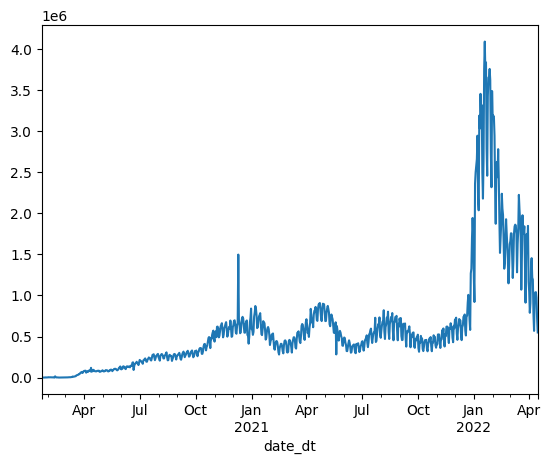

In [26]:
covid_world['confirmed_delta'].plot.line();

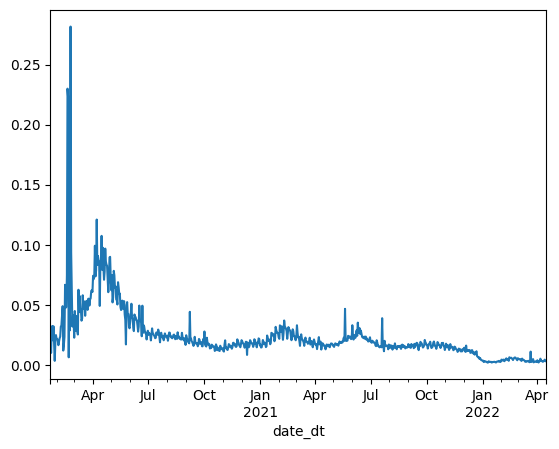

In [29]:
(covid_world['deaths_delta'] / covid_world['confirmed_delta']).plot.line();

если смотреть в среднемировом разрезе, как можно оценить, на какой день болезни шанс умереть больше всего? Попробуйте проверить, можно ли говорить о какой-либо статистической значимости в контексте вашего ответа

In [ ]:
X ... symptom ... ill ... recovered

In [11]:
# найти такой лаг (сдвиг в прошлое) переменной confirmed_delta, что корреляция с переменной deaths_delta максимальна
lags = list(range(51))
coefs = []

for lag in lags:
    confirmed_shifted = covid_world['confirmed_delta'].shift(lag, fill_value=0)
    coef = np.corrcoef(confirmed_shifted.values[lag:], covid_world['deaths_delta'].values[lag:])[0, 1]

    coefs.append(coef)

In [64]:
np.corrcoef(covid_world['confirmed_delta'].values, covid_world['deaths_delta'].values)[1, 0]

0.3093752475954413

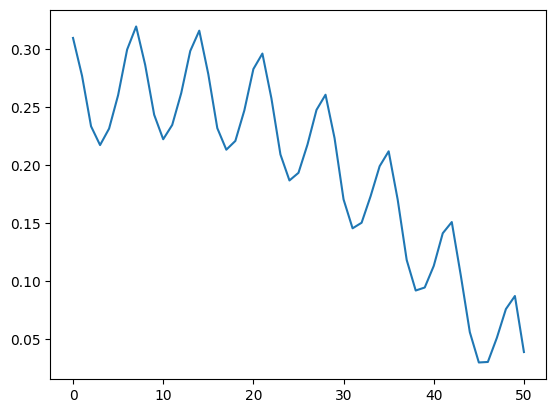

In [53]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(lags, coefs);

In [54]:
np.array(coefs).argmax()

7

**Проверим коэффициент корреляции на значимость**

In [57]:
lag = np.array(coefs).argmax()
cor = coefs[lag]
cor

0.3192401664909657

In [ ]:
# H0: на самом деле никакой корреляции нет, значение случайно
# нужно добыть распределение коэффициентов корреляции при условии, что они случайны

# фиксируем вектор 1
# случайным образом перемешиваем значения вектора 2
# считаем корреляцию вектора 1 и вектора 2
# повторяем много раз

In [59]:
def simulate_cor(vector1, vector2):
    vector2_p = np.random.permutation(vector2)
    coef = np.corrcoef(vector1, vector2_p)[0, 1]
    
    return coef

N = 100000

random_coefs = [
    simulate_cor(
        covid_world['confirmed_delta'].shift(lag, fill_value=0).values[lag:],
        covid_world['deaths_delta'].values[lag:]
    )
    for i
    in range(N)
]

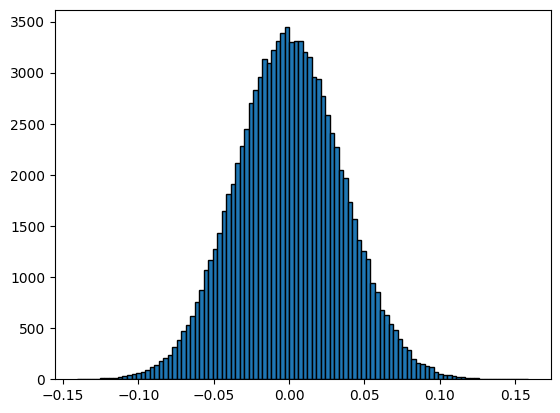

In [60]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(random_coefs, bins=100, edgecolor='black');

In [62]:
cor

0.3192401664909657

**Для Задания 5**

Необходимо получить дельты для данных по странам.

In [16]:
def add_delta(country_df: pd.DataFrame) -> pd.DataFrame:
    country_df = country_df.sort_values(by='date')  # на всякий случай

    for col in numeric_cols:
        country_df[f'{col}_delta'] = country_df[col].diff().fillna(country_df[col].values[0])
        country_df.loc[country_df[f'{col}_delta'] < 0, f'{col}_delta'] = 0
        country_df[f'{col}_log'] = np.log(country_df[f'{col}_delta'].values + 1)

    return country_df

In [17]:
covid_deltas = covid_agg.groupby(['country_region'], as_index=False).apply(add_delta).reset_index(drop=True)

In [16]:
(covid_deltas[['confirmed_delta', 'recovered_delta', 'deaths_delta']] < 0).sum()

confirmed_delta    0
recovered_delta    0
deaths_delta       0
dtype: int64

In [17]:
covid_deltas.head()

,date,date_dt,country_region,confirmed,recovered,deaths,confirmed_delta,recovered_delta,deaths_delta
0,2020-01-22,2020-01-22,Afghanistan,0,0.0,0,0.0,0.0,0.0
1,2020-01-23,2020-01-23,Afghanistan,0,0.0,0,0.0,0.0,0.0
2,2020-01-24,2020-01-24,Afghanistan,0,0.0,0,0.0,0.0,0.0
3,2020-01-25,2020-01-25,Afghanistan,0,0.0,0,0.0,0.0,0.0
4,2020-01-26,2020-01-26,Afghanistan,0,0.0,0,0.0,0.0,0.0


In [66]:
covid_agg.groupby(['country_region'])

In [67]:
grouped = list(covid_renamed.groupby(['country_region'], as_index=False))

In [68]:
grouped[0]

(('Afghanistan',),
            date country_region province_state  confirmed  recovered  deaths  \
 0    2020-01-22    Afghanistan            NaN          0        0.0       0   
 1    2020-01-23    Afghanistan            NaN          0        0.0       0   
 2    2020-01-24    Afghanistan            NaN          0        0.0       0   
 3    2020-01-25    Afghanistan            NaN          0        0.0       0   
 4    2020-01-26    Afghanistan            NaN          0        0.0       0   
 ..          ...            ...            ...        ...        ...     ...   
 811  2022-04-12    Afghanistan            NaN     178257        0.0    7676   
 812  2022-04-13    Afghanistan            NaN     178295        0.0    7676   
 813  2022-04-14    Afghanistan            NaN     178352        0.0    7676   
 814  2022-04-15    Afghanistan            NaN     178373        0.0    7676   
 815  2022-04-16    Afghanistan            NaN     178387        0.0    7676   
 
        date_dt  
 

#### Задание 4

Изобразите распределение всех трех показателей прироста с помощью:

1. Гистограммы
2. Ящика с усами (boxplot)
3. Функции распределения

На одном графике.

Повторите то же самое для логарифмированных показателей.

In [18]:
covid_world.head()

,date,date_dt,confirmed,recovered,deaths,confirmed_delta,recovered_delta,deaths_delta
date_dt,,,,,,,,
2020-01-22,2020-01-22,2020-01-22,557,30.0,17,557.0,30.0,17.0
2020-01-23,2020-01-23,2020-01-23,657,32.0,18,100.0,2.0,1.0
2020-01-24,2020-01-24,2020-01-24,944,39.0,26,287.0,7.0,8.0
2020-01-25,2020-01-25,2020-01-25,1437,42.0,42,493.0,3.0,16.0
2020-01-26,2020-01-26,2020-01-26,2120,56.0,56,683.0,14.0,14.0


In [13]:
import matplotlib.pyplot as plt

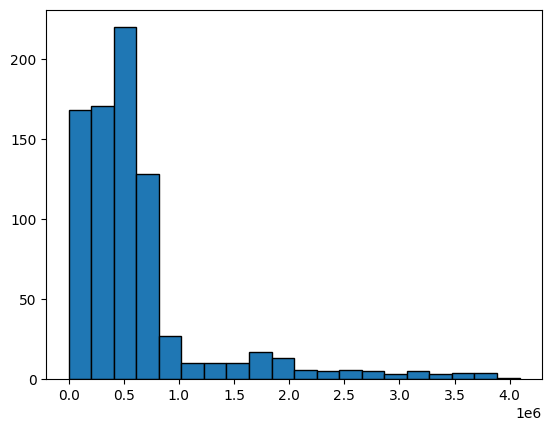

In [29]:
fig, ax = plt.subplots()

ax.hist(covid_world['confirmed_delta'], edgecolor='black', bins=20);

In [35]:
numeric_cols

['confirmed', 'recovered', 'deaths']

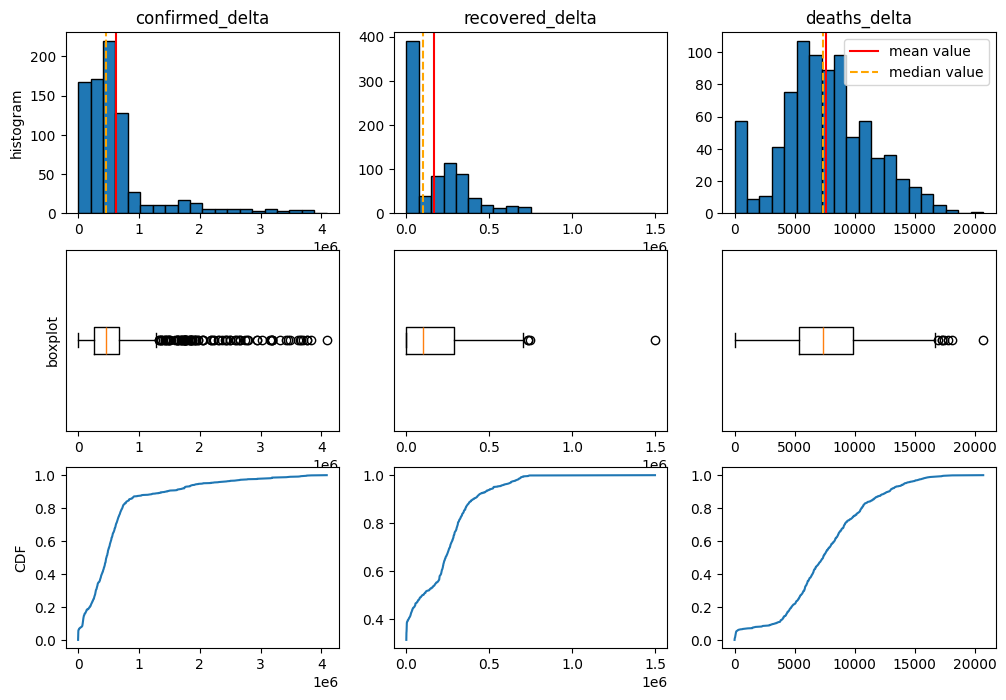

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

for index in range(len(numeric_cols)):
    colname = f'{numeric_cols[index]}_delta'

    colmean = covid_world[colname].mean()
    colmedian = covid_world[colname].median()

    # histogram
    axes[0, index].hist(covid_world[colname], edgecolor='black', bins=20)
    axes[0, index].set_title(colname)
    
    axes[0, index].axvline(colmean, color='red', label='mean value')
    axes[0, index].axvline(colmedian, color='orange', linestyle='dashed', label='median value')

    if index == 0:
        axes[0, index].set_ylabel('histogram')
    if index == 2:
        axes[0, index].legend()

    # boxplots
    axes[1, index].boxplot(covid_world[colname], vert=False)
    
    if index == 0:
        axes[1, index].set_ylabel('boxplot')

    axes[1, index].set_yticks([])
    # axes[1, index].yaxis.set_major_formatter('')

    # cumulative distribution function
    array = np.sort(covid_world[colname].values)
    farray = (array <= array.reshape((array.size, 1))).mean(axis=1)
    
    axes[2, index].plot(array, farray)

    if index == 0:
        axes[2, index].set_ylabel('CDF')

In [69]:
array = np.sort(covid_world['confirmed_delta'].values).round().astype(int)

In [73]:
array

array([    100,     287,     382,     418,     493,     500,     557,
           561,     568,     589,     630,     683,     809,     854,
           973,    1345,    1424,    1690,    1762,    1876,    1882,
          1983,    2035,    2043,    2068,    2111,    2143,    2183,
          2325,    2380,    2609,    2611,    2651,    2717,    2731,
          3031,    3100,    3162,    3594,    3745,    3850,    3930,
          4012,    4146,    4327,    4749,    4809,    6528,    6755,
          7520,   10944,   11259,   13290,   14518,   15152,   15297,
         17657,   27116,   29544,   32415,   34472,   42084,   42904,
         51115,   56231,   60086,   61414,   63937,   65249,   68979,
         69146,   70872,   70922,   71622,   72025,   74161,   74511,
         75253,   75419,   75856,   75908,   75976,   76273,   76661,
         77344,   77385,   77813,   78189,   78354,   78408,   78428,
         79639,   81565,   81937,   81997,   82307,   82616,   83507,
         83841,   84

In [76]:
array.reshape((array.size, 1))

array([[    100],
       [    287],
       [    382],
       [    418],
       [    493],
       [    500],
       [    557],
       [    561],
       [    568],
       [    589],
       [    630],
       [    683],
       [    809],
       [    854],
       [    973],
       [   1345],
       [   1424],
       [   1690],
       [   1762],
       [   1876],
       [   1882],
       [   1983],
       [   2035],
       [   2043],
       [   2068],
       [   2111],
       [   2143],
       [   2183],
       [   2325],
       [   2380],
       [   2609],
       [   2611],
       [   2651],
       [   2717],
       [   2731],
       [   3031],
       [   3100],
       [   3162],
       [   3594],
       [   3745],
       [   3850],
       [   3930],
       [   4012],
       [   4146],
       [   4327],
       [   4749],
       [   4809],
       [   6528],
       [   6755],
       [   7520],
       [  10944],
       [  11259],
       [  13290],
       [  14518],
       [  15152],
       [  

In [77]:
(array <= array.reshape((array.size, 1))).mean(axis=1)

array([0.00122549, 0.00245098, 0.00367647, 0.00490196, 0.00612745,
       0.00735294, 0.00857843, 0.00980392, 0.01102941, 0.0122549 ,
       0.01348039, 0.01470588, 0.01593137, 0.01715686, 0.01838235,
       0.01960784, 0.02083333, 0.02205882, 0.02328431, 0.0245098 ,
       0.02573529, 0.02696078, 0.02818627, 0.02941176, 0.03063725,
       0.03186275, 0.03308824, 0.03431373, 0.03553922, 0.03676471,
       0.0379902 , 0.03921569, 0.04044118, 0.04166667, 0.04289216,
       0.04411765, 0.04534314, 0.04656863, 0.04779412, 0.04901961,
       0.0502451 , 0.05147059, 0.05269608, 0.05392157, 0.05514706,
       0.05637255, 0.05759804, 0.05882353, 0.06004902, 0.06127451,
       0.0625    , 0.06372549, 0.06495098, 0.06617647, 0.06740196,
       0.06862745, 0.06985294, 0.07107843, 0.07230392, 0.07352941,
       0.0747549 , 0.07598039, 0.07720588, 0.07843137, 0.07965686,
       0.08088235, 0.08210784, 0.08333333, 0.08455882, 0.08578431,
       0.0870098 , 0.08823529, 0.08946078, 0.09068627, 0.09191

In [72]:
(array <= 418).mean()

0.004901960784313725

In [63]:
4, -5, 8, 0, 2

-4, 0, 2, 4, 8

(4, -5, 8, 0, 2)

In [32]:
F(0) = 0.4
F(8) = 1
F(-6) = 0

<Axes: >

In [ ]:
F(x) = P(X <= x)

#### Задание 5

Изобразите для шести понравившихся вам стран взаимосвязь между логарифмированными показателями прироста заболевших и умерших (по графику на страну, все на одной картинке). Сделайте это тремя способами: с помощью `matplotlib`, `seaborn` и `plotly`.

In [19]:
# выберем три страны с наибольшей корреляцией между показателями и три с наименьшей

def custom_corr(country_df: pd.DataFrame) -> float:
    coef = np.corrcoef(country_df['confirmed_log'].values, country_df['deaths_log'].values)[0, 1]

    return coef

In [30]:
cols = ['confirmed_log', 'deaths_log']

corrs = [(group, custom_corr(df)) for group, df in covid_deltas.groupby('country_region')[cols]]
corrs_df = pd.DataFrame(corrs, columns=['country', 'cor']).dropna(ignore_index=True)

corrs_df_sorted = corrs_df.sort_values(by='cor', ignore_index=True)

/Users/iadovgopolyi/teaching/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/iadovgopolyi/teaching/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [34]:
chosen_countries = corrs_df_sorted.loc[[0, 1, 2, *corrs_df_sorted.index[-3:].tolist()], 'country'].tolist()

covid_deltas_filtered = covid_deltas[covid_deltas['country_region'].isin(chosen_countries)].reset_index(drop=True)

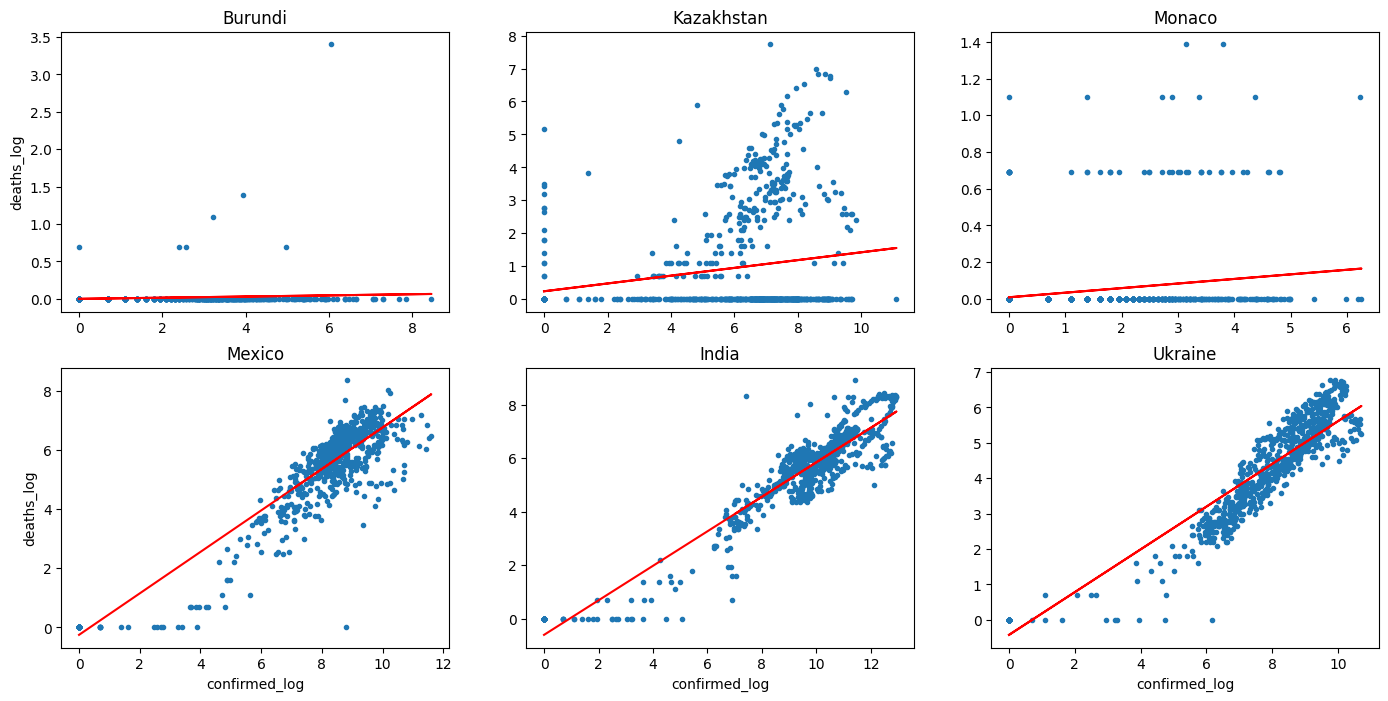

In [48]:
# matplotlib
# country variable is mapped to multiple plots
fig, axes = plt.subplots(2, 3, figsize=(17, 8))

for index, country in enumerate(chosen_countries):
    country_df = covid_deltas_filtered[covid_deltas_filtered['country_region'] == country]

    X = country_df['confirmed_log'].values
    y = country_df['deaths_log'].values

    row_index = index // 3
    col_index = index % 3

    # scatterplot
    axes[row_index, col_index].plot(X, y, marker='.', linestyle='None')
    axes[row_index, col_index].set_title(country)

    # regression line
    k, b = np.polyfit(X, y, 1)

    y_pred = k * X + b

    axes[row_index, col_index].plot(X, y_pred, color='red')

    if row_index == 1:
        axes[row_index, col_index].set_xlabel('confirmed_log')

    if col_index == 0:
        axes[row_index, col_index].set_ylabel('deaths_log')

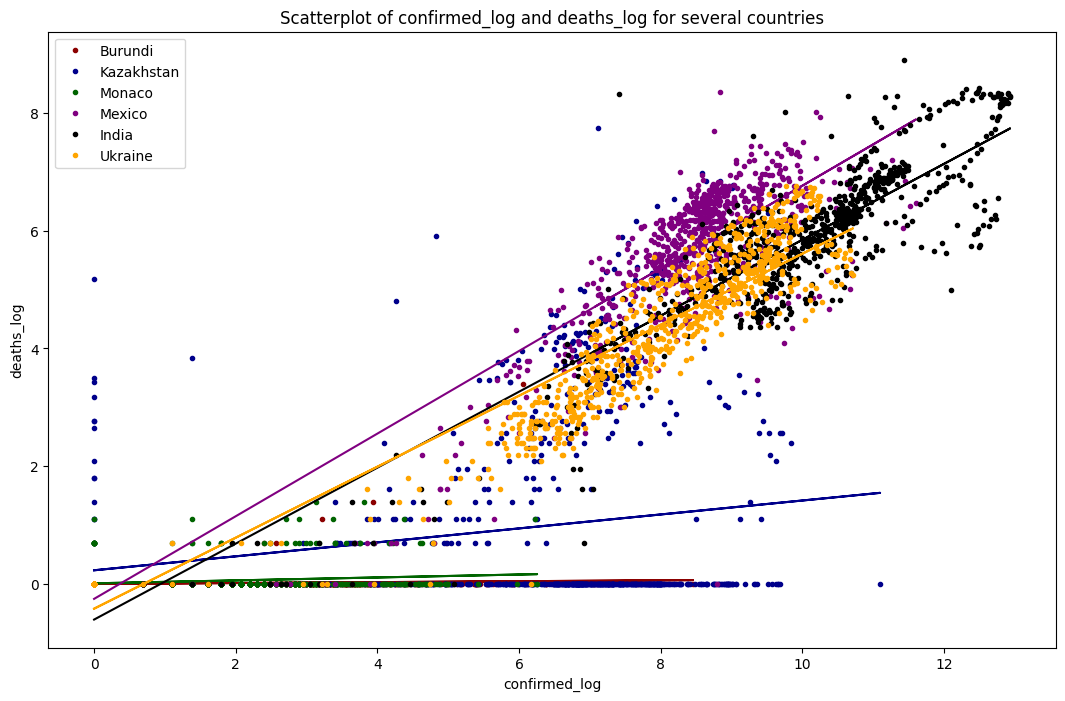

In [60]:
# country variable is mapped to colors
colors = ['darkred', 'darkblue', 'darkgreen', 'purple', 'black', 'orange']

fig, ax = plt.subplots(figsize=(13, 8))

for country, color in zip(chosen_countries, colors):
    country_df = covid_deltas_filtered[covid_deltas_filtered['country_region'] == country]

    X = country_df['confirmed_log'].values
    y = country_df['deaths_log'].values

    # scatterplot
    ax.plot(X, y, marker='.', linestyle='None', color=color, label=country)

    # regression line
    k, b = np.polyfit(X, y, 1)

    y_pred = k * X + b

    ax.plot(X, y_pred, color=color)

ax.set_title('Scatterplot of confirmed_log and deaths_log for several countries')
ax.set_xlabel('confirmed_log')
ax.set_ylabel('deaths_log')

ax.legend();

In [72]:
covid_deltas_filtered[
    (covid_deltas_filtered['country_region'] == 'Kazakhstan') &
    (covid_deltas_filtered['confirmed_log'] > 11)
]

,date,date_dt,country_region,confirmed,recovered,deaths,confirmed_delta,confirmed_log,recovered_delta,recovered_log,deaths_delta,deaths_log
2180,2021-07-23,2021-07-23,Kazakhstan,641388,498125.0,8538,66121.0,11.099257,2908.0,7.975565,0.0,0.0


In [ ]:
y = kx + b

In [49]:
# seaborn
import seaborn as sns

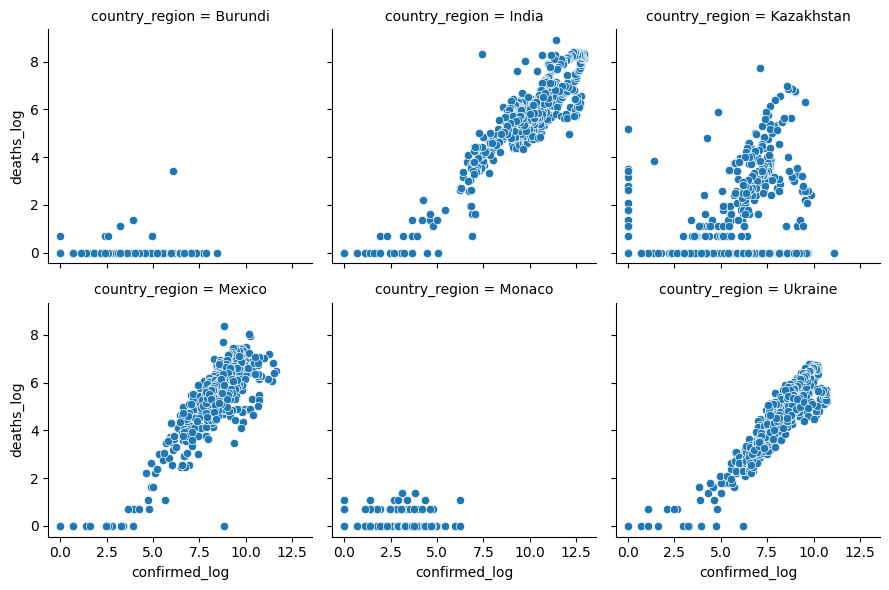

In [64]:
grid = sns.FacetGrid(covid_deltas_filtered, col='country_region', col_wrap=3)

grid.map(sns.scatterplot, 'confirmed_log', 'deaths_log');

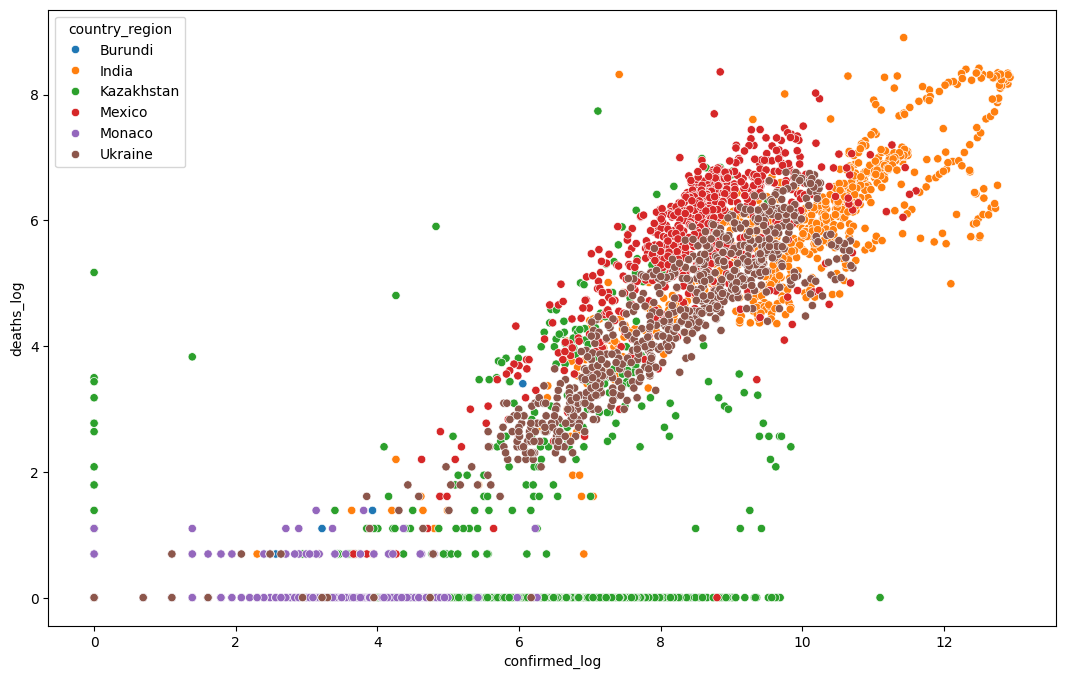

In [69]:
fig, ax = plt.subplots(figsize=(13, 8))

sns.scatterplot(
    data=covid_deltas_filtered,
    x='confirmed_log',
    y='deaths_log',
    hue='country_region'
);

In [70]:
?sns.scatterplot

Signature:
sns.scatterplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    size=None,
    style=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    markers=True,
    style_order=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Draw a scatter plot with possibility of several semantic groupings.

The relationship between `x` and `y` can be shown for different subsets
of the data using the `hue`, `size`, and `style` parameters. These
parameters control what visual semantics are used to identify the different
subsets. It is possible to show up to three dimensions independently by
using all three semantic types, but this style of plot can be hard to
interpret and is often ineffective. Using redundant semantics (i.e. both
`hue` and `style` for the same variable) can be helpful for making
graphics more accessible.

See the :ref:`tutorial <relational_tutorial>` for more information.

The de